In [1]:
import dataframe_image as dfi
import matplotlib.pyplot as plt
import mlrose_hiive
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.metrics import accuracy_score
from sklearn.model_selection import (GridSearchCV, train_test_split, validation_curve)   
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
np.random.seed(42)

In [2]:
import time
import matplotlib.pyplot as plt
import mlrose_hiive
import numpy as np

def four_peaks_input_size():
    dic={}
    fitness_sa_arr = []
    fitness_rhc_arr = []
    fitness_ga_arr = []
    fitness_mimic_arr = []

    time_sa_arr = []
    time_rhc_arr = []
    time_ga_arr = []
    time_mimic_arr = []

    input_sizes = np.arange(5, 120, 20)

    for n in input_sizes:
        fitness = mlrose_hiive.FourPeaks(t_pct=0.45)
        problem = mlrose_hiive.DiscreteOpt(length=n, fitness_fn=fitness, maximize=True, max_val=2)
        init_state = np.random.randint(2, size=n)
        schedule = mlrose_hiive.ExpDecay()

        # Simulated Annealing
        st = time.time()
        best_state_sa, best_fitness_sa, _ = mlrose_hiive.simulated_annealing(mlrose_hiive.DiscreteOpt(length=n, fitness_fn=mlrose_hiive.FourPeaks(t_pct=0.45), maximize=True, max_val=2),
                              schedule=mlrose_hiive.ExpDecay(init_temp=100), max_attempts=1000, max_iters=1000, init_state=init_state, curve=True)
        end = time.time()
        sa_time = end - st

        # Randomized Hill Climbing
        st = time.time()
        best_state_rhc, best_fitness_rhc, _ = mlrose_hiive.random_hill_climb(mlrose_hiive.DiscreteOpt(length=n, fitness_fn=mlrose_hiive.FourPeaks(t_pct=0.45), maximize=True, max_val=2),
                               restarts=10, max_attempts=1000, max_iters=1000, init_state=init_state, curve=True)
        end = time.time()
        rhc_time = end - st

        # Genetic Algorithm
        st = time.time()
        best_state_ga, best_fitness_ga, _ = mlrose_hiive.genetic_alg(mlrose_hiive.DiscreteOpt(length=n, fitness_fn=mlrose_hiive.FourPeaks(t_pct=0.45), maximize=True, max_val=2),
                                                mutation_prob=0.5, pop_size=500, max_attempts=1000, max_iters=1000, curve=True)
        end = time.time()
        ga_time = end - st

        # MIMIC
        st = time.time()
        best_state_mimic, best_fitness_mimic, _ = mlrose_hiive.mimic(mlrose_hiive.DiscreteOpt(length=n, fitness_fn=mlrose_hiive.FourPeaks(t_pct=0.45), maximize=True, max_val=2),
                                                keep_pct=0.5, pop_size=500, max_attempts=100, max_iters=1000, curve=True)
        end = time.time()
        mimic_time = end - st

        print(f"Completed for input size: {n}")

        fitness_sa_arr.append(best_fitness_sa)
        fitness_rhc_arr.append(best_fitness_rhc)
        fitness_ga_arr.append(best_fitness_ga)
        fitness_mimic_arr.append(best_fitness_mimic)

        time_sa_arr.append(sa_time)
        time_rhc_arr.append(rhc_time)
        time_ga_arr.append(ga_time)
        time_mimic_arr.append(mimic_time)

    # Convert lists to numpy np.arrays
    fitness_sa_arr = np.np.np.np.np.np.np.array(fitness_sa_arr)
    fitness_rhc_arr = np.array(fitness_rhc_arr)
    fitness_ga_arr = np.array(fitness_ga_arr)
    fitness_mimic_arr = np.array(fitness_mimic_arr)

    dic['sa_ft']=fitness_sa_arr
    dic['rhc_ft']=fitness_rhc_arr
    dic['ga_ft']=fitness_ga_arr
    dic['mimic_ft']=fitness_mimic_arr

    time_sa_arr = np.array(time_sa_arr)
    time_rhc_arr = np.array(time_rhc_arr)
    time_ga_arr = np.array(time_ga_arr)
    time_mimic_arr = np.array(time_mimic_arr)
    dic['sa_ti']=time_sa_arr
    dic['rhc_ti']=time_rhc_arr
    dic['ga_ti']=time_ga_arr
    dic['mimic_ti']=time_mimic_arr    

    # Plotting
    plt.figure()
    plt.plot(input_sizes, fitness_sa_arr, marker='o', linestyle='-', label='SA')
    plt.plot(input_sizes, fitness_rhc_arr, marker='s', linestyle='--', label='RHC')
    plt.plot(input_sizes, fitness_ga_arr, marker='^', linestyle='-.', label='GA')
    plt.plot(input_sizes, fitness_mimic_arr, marker='*', linestyle=':', label='MIMIC')
    plt.xscale('log')  # Use a logarithmic scale for better visualization
    plt.xlabel('Input Size')
    plt.ylabel('Fitness Value')
    plt.legend()
    plt.title('Fitness Value vs. Input Size (4 Peaks)')
    plt.savefig('4_peaks_input_size_fitness.png')

    plt.figure()
    plt.plot(input_sizes, time_sa_arr, marker='o', linestyle='-', label='SA')
    plt.plot(input_sizes, time_rhc_arr, marker='s', linestyle='--', label='RHC')
    plt.plot(input_sizes, time_ga_arr, marker='^', linestyle='-.', label='GA')
    plt.plot(input_sizes, time_mimic_arr, marker='*', linestyle=':', label='MIMIC')
    plt.xscale('log')  # Use a logarithmic scale for better visualization
    plt.legend()
    plt.xlabel('Input Size')
    plt.ylabel('Computation Time (s)')
    plt.title('Computation Time vs. Input Size (4 Peaks)')
    plt.savefig('4_peaks_input_size_computation.png')
    return dic

# Run the function
dic=four_peaks_input_size()


KeyboardInterrupt: 

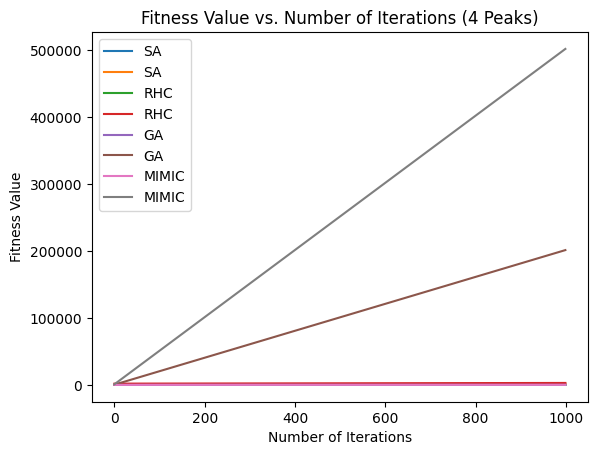

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mlrose_hiive

def four_peaks_iterations():
    # Set up the problem
    fitness = mlrose_hiive.FourPeaks(t_pct=0.45)
    problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
    init_state = np.random.randint(2, size=100)
    schedule = mlrose_hiive.ExpDecay()

    # Run optimization algorithms
    sa_params = {'schedule': schedule, 'max_attempts': 1000, 'max_iters': 1000, 'init_state': init_state, 'curve': True}
    rhc_params = {'max_attempts': 1000, 'max_iters': 1000, 'init_state': init_state, 'curve': True}
    ga_params = {'max_attempts': 1000, 'max_iters': 1000, 'curve': True}
    mimic_params = {'pop_size': 500, 'max_attempts': 100, 'max_iters': 1000, 'curve': True}

    algorithms = [
        ('SA', mlrose_hiive.simulated_annealing, sa_params),
        ('RHC', mlrose_hiive.random_hill_climb, rhc_params),
        ('GA', mlrose_hiive.genetic_alg, ga_params),
        ('MIMIC', mlrose_hiive.mimic, mimic_params)
    ]

    plt.figure()
    for name, algorithm, params in algorithms:
        _, _, fitness_curve = algorithm(problem, **params)
        plt.plot(fitness_curve, label=name)

    plt.legend()
    plt.ylabel('Fitness Value')
    plt.xlabel('Number of Iterations')
    plt.title('Fitness Value vs. Number of Iterations (4 Peaks)')
    plt.savefig('4_peaks_iterations.png')

four_peaks_iterations()

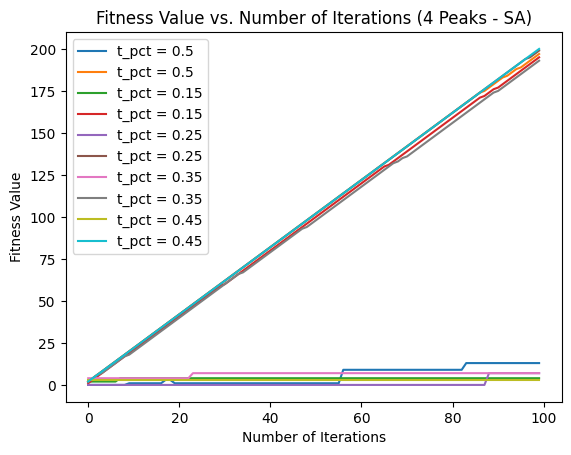

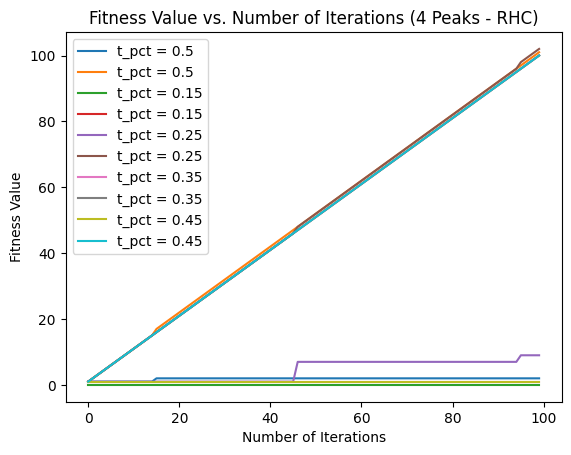

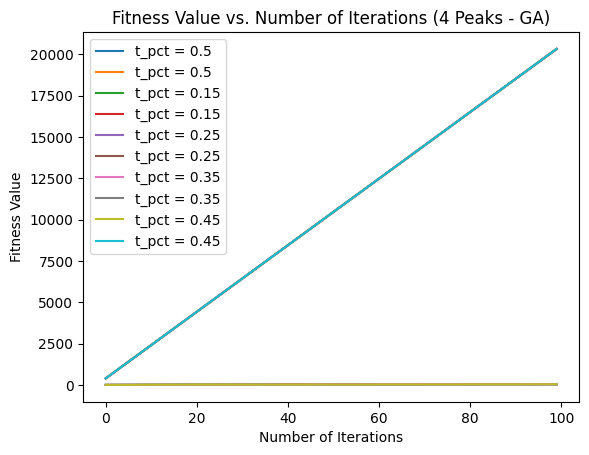

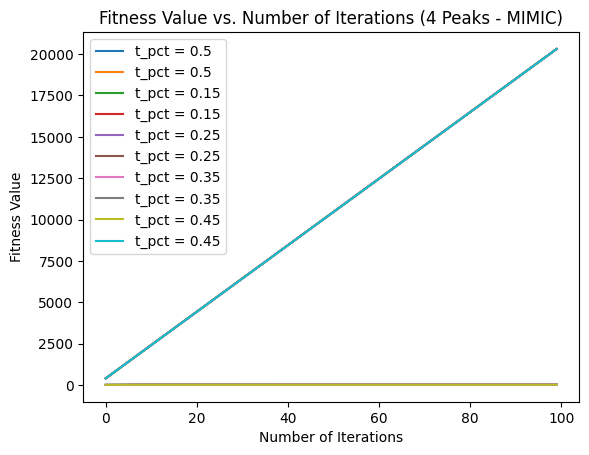

In [ ]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt

def optimize_algorithm(algorithm, t_pct_values):
    fitness_curves = []

    for t_pct in t_pct_values:
        fitness = mlrose_hiive.FourPeaks(t_pct=t_pct)
        problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
        # init_state = np.random.randint(2, size=100)

        # For random_hill_climb, use max_attempts and max_iters instead of schedule
        if algorithm == mlrose_hiive.simulated_annealing:
            schedule = mlrose_hiive.ExpDecay()
            _, _, fitness_curve = algorithm(problem, schedule=schedule, max_attempts=100, max_iters=100, curve=True)
        else:      
            _, _, fitness_curve = algorithm(problem, max_attempts=100, max_iters=100, curve=True)
            
        fitness_curves.append((t_pct, fitness_curve))

    return fitness_curves

def plot_fitness_curves(fitness_curves, algorithm_name):
    plt.figure()
    for t_pct, curve in fitness_curves:
        plt.plot(curve, label=f't_pct = {t_pct}')
    plt.legend()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Fitness Value')
    plt.title(f'Fitness Value vs. Number of Iterations (4 Peaks - {algorithm_name})')
    plt.savefig(f'4_peaks_t_pct_{algorithm_name}.png')

# Simulated Annealing
t_pct_values = [0.5, 0.15, 0.25, 0.35, 0.45]
sa_fitness_curves = optimize_algorithm(mlrose_hiive.simulated_annealing, t_pct_values)
plot_fitness_curves(sa_fitness_curves, 'SA')

# Randomized Hill Climbing
rhc_fitness_curves = optimize_algorithm(mlrose_hiive.random_hill_climb, t_pct_values)
plot_fitness_curves(rhc_fitness_curves, 'RHC')

# Genetic Algorithm
ga_fitness_curves = optimize_algorithm(mlrose_hiive.genetic_alg, t_pct_values)
plot_fitness_curves(ga_fitness_curves, 'GA')

ga_fitness_curves = optimize_algorithm(mlrose_hiive.mimic, t_pct_values)
plot_fitness_curves(ga_fitness_curves, 'MIMIC')


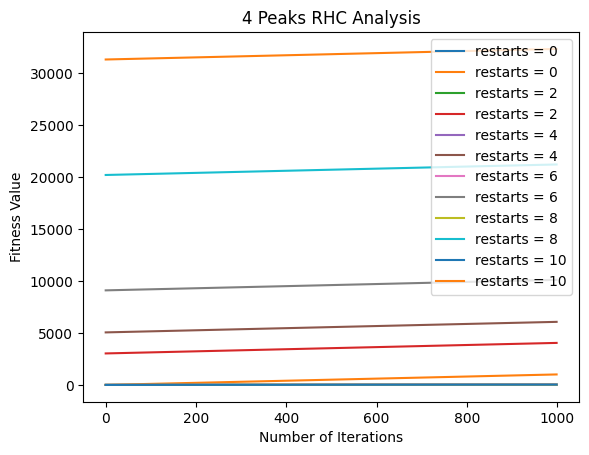

In [49]:
def four_peaks_rhc_analysis():
    fitness = mlrose_hiive.FourPeaks(t_pct=0.45)
    problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
    init_state = np.random.randint(2, size=100)
    max_attempts = 1000
    max_iters = 1000

    restarts_values = [0, 2, 4, 6, 8, 10]
    fitness_curves = []

    plt.figure()  # Clear previous figure
    for restarts in restarts_values:
        _, _, fitness_curve = mlrose_hiive.random_hill_climb(problem, restarts=restarts, max_attempts=max_attempts, max_iters=max_iters, init_state=init_state, curve=True)
        fitness_curves.append((restarts, fitness_curve))
    # print(fitness_curves[0],fitness_curves[1],len(fitness_curves))
    for restarts, curve in fitness_curves:
        plt.plot(curve, label=f'restarts = {restarts}')

    plt.title('4 Peaks RHC Analysis')
    plt.legend()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Fitness Value')
    plt.savefig('4_peaks_rhc_analysis.png')

# Call the function
four_peaks_rhc_analysis()

# _, _, fitness_curve=mlrose_hiive.random_hill_climb(mlrose_hiive.DiscreteOpt(length=100, fitness_fn=mlrose_hiive.FourPeaks(t_pct=0.45), maximize=True, max_val=2),
#                                restarts=10, max_attempts=1000, max_iters=1000, init_state=np.random.randint(2, size=100), curve=True)

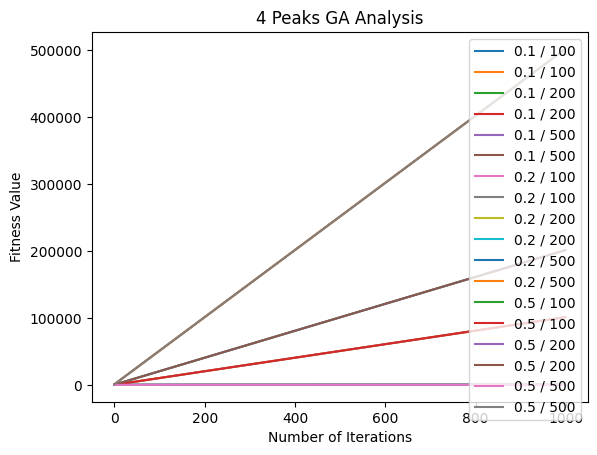

In [50]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt

def run_ga_analysis(mutation_probs, pop_sizes):
    fitness_curves = []

    for mutation_prob in mutation_probs:
        for pop_size in pop_sizes:
            fitness = mlrose_hiive.FourPeaks(t_pct=0.45)
            problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
            init_state = np.random.randint(2, size=100)
            _, _, fitness_curve = mlrose_hiive.genetic_alg(problem, mutation_prob=mutation_prob, pop_size=pop_size, max_attempts=1000, max_iters=1000, curve=True)
            fitness_curves.append((mutation_prob, pop_size, fitness_curve))

    return fitness_curves

def plot_ga_analysis(fitness_curves):
    plt.figure()
    for mutation_prob, pop_size, curve in fitness_curves:
        label = f'{mutation_prob} / {pop_size}'
        plt.plot(curve, label=label)

    plt.title('4 Peaks GA Analysis')
    plt.legend()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Fitness Value')
    plt.savefig('4_peaks_ga_analysis.png')

# Define mutation probabilities and population sizes
mutation_probs = [0.1, 0.2, 0.5]
pop_sizes = [100, 200, 500]

# Run GA analysis
ga_fitness_curves = run_ga_analysis(mutation_probs, pop_sizes)

# Plot results
plot_ga_analysis(ga_fitness_curves)

# _, _, fitness_curve = mlrose_hiive.genetic_alg(mlrose_hiive.DiscreteOpt(length=100, fitness_fn=mlrose_hiive.FourPeaks(t_pct=0.45), maximize=True, max_val=2),
#                                                 mutation_prob=0.5, pop_size=500, max_attempts=1000, max_iters=1000, curve=True)

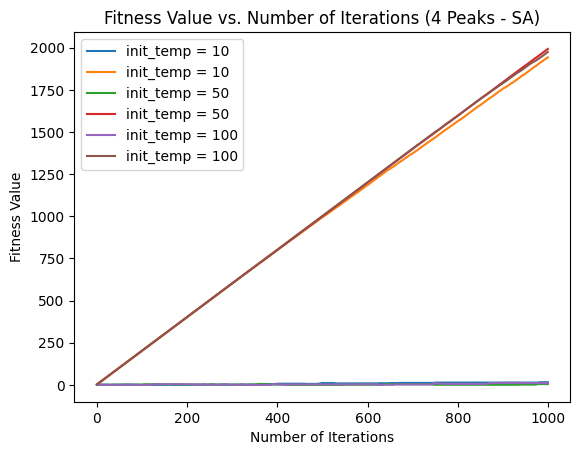

In [56]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt

def optimize_algorithm(algorithm, t_pct_values, init_temp_values, perturbation_values):
    fitness_curves = []

    for init_temp in init_temp_values:
        fitness = mlrose_hiive.FourPeaks(t_pct=0.45)
        problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
        init_state = np.random.randint(2, size=100)

        # Adjust temperature and perturbation here
        schedule = mlrose_hiive.ExpDecay(init_temp=init_temp)

        _, _, fitness_curve = algorithm(problem, schedule=schedule, max_attempts=1000, max_iters=1000,
                                        init_state=init_state, curve=True)
        
        fitness_curves.append((init_temp, fitness_curve))

    return fitness_curves

def plot_fitness_curves(fitness_curves, algorithm_name):
    plt.figure()
    for init_temp, curve in fitness_curves:
        label = f'init_temp = {init_temp}'
        plt.plot(curve, label=label)
    
    plt.legend()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Fitness Value')
    plt.title(f'Fitness Value vs. Number of Iterations (4 Peaks - {algorithm_name})')
    plt.savefig(f'4_peaks_tweaked_params_{algorithm_name}.png')

# Simulated Annealing with tweaked parameters
init_temp_values = [10, 50, 100]
perturbation_values = [0.1, 0.3, 0.5]

sa_fitness_curves = optimize_algorithm(mlrose_hiive.simulated_annealing, t_pct_values, init_temp_values, perturbation_values)
plot_fitness_curves(sa_fitness_curves, 'SA')

# _, _, fitness_curve = mlrose_hiive.simulated_annealing(mlrose_hiive.DiscreteOpt(length=100, fitness_fn=mlrose_hiive.FourPeaks(t_pct=0.45), maximize=True, max_val=2),
#                               schedule=mlrose_hiive.ExpDecay(init_temp=100), max_attempts=1000, max_iters=1000, init_state=np.random.randint(2, size=100), curve=True)

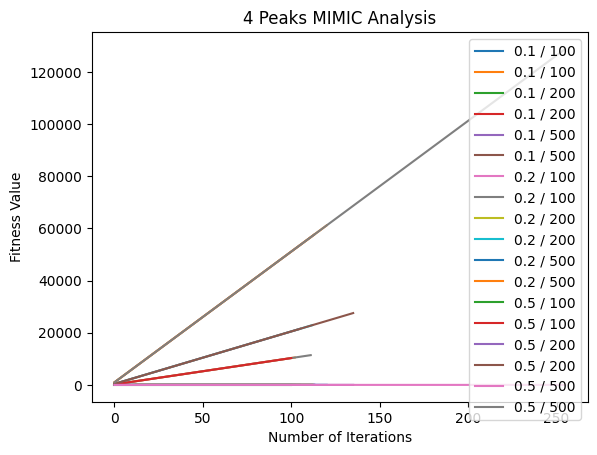

In [57]:
def four_peaks_mimic_analysis():
    fitness = mlrose_hiive.FourPeaks(t_pct=0.15)
    problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
    init_state = np.random.randint(2, size=100)
    schedule = mlrose_hiive.ExpDecay()

    keep_pct_values = [0.1, 0.2, 0.5]
    pop_size_values = [100, 200, 500]

    plt.figure()

    for keep_pct in keep_pct_values:
        for pop_size in pop_size_values:
            best_state, best_fitness, fitness_curve = mlrose_hiive.mimic(problem, keep_pct=keep_pct, pop_size=pop_size,
                                                                        max_attempts=100, max_iters=1000, curve=True)
            label = f'{keep_pct} / {pop_size}'
            plt.plot(fitness_curve, label=label)

    plt.title('4 Peaks MIMIC Analysis')
    plt.legend()
    plt.xlabel('Number of Iterations')
    plt.ylabel('Fitness Value')
    plt.savefig('4_peaks_mimic_analysis.png')

four_peaks_mimic_analysis()


In [61]:
print(dic)

{'sa_ft': array([ 5., 17., 19., 14.,  2., 18.]), 'rhc_ft': array([ 5., 25., 45., 61., 37., 38.]), 'ga_ft': array([  5.,  25.,  45.,  65.,  85., 105.]), 'mimic_ft': array([ 5., 19., 17., 25., 30., 21.]), 'sa_ti': array([0.01553965, 0.01857042, 0.04104638, 0.02481556, 0.02315426,
       0.01618695]), 'rhc_ti': array([0.12306237, 0.1531074 , 0.17871284, 0.11879683, 0.10633278,
       0.10498214]), 'ga_ti': array([32.29401016, 35.85201955, 38.71396804, 43.77587128, 39.88105917,
       41.26161313]), 'mimic_ti': array([  1.85743666,  39.51610923, 153.42770696, 536.6016469 ,
       624.22201514, 793.44279337])}


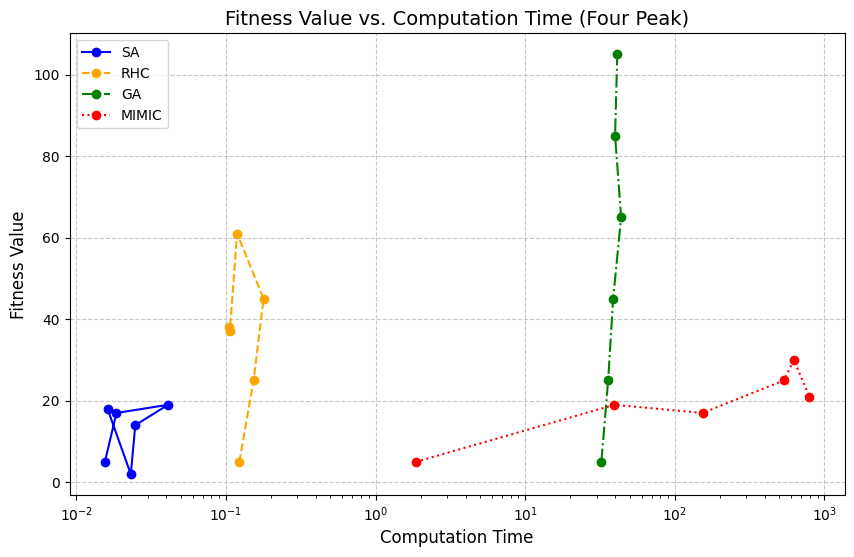

In [65]:
import matplotlib.pyplot as plt

def plot_fitness_vs_time(input_sizes, fitness_arr, time_arr, algorithm_names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size

    # Define different line styles and colors for better distinction
    line_styles = ['-', '--', '-.', ':']
    line_colors = ['blue', 'orange', 'green', 'red']

    for i in range(len(algorithm_names)):
        plt.plot(time_arr[i], fitness_arr[i], label=algorithm_names[i], linestyle=line_styles[i], color=line_colors[i], marker='o')

    plt.xscale('log')  # Use a logarithmic scale for better visualization
    plt.xlabel('Computation Time', fontsize=12)
    plt.ylabel('Fitness Value', fontsize=12)
    plt.legend(loc='upper left')  # Adjust legend placement
    plt.title('Fitness Value vs. Computation Time (Four Peak)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines for better readability

    # Save the figure with a higher DPI for better resolution
    plt.savefig('fitness_vs_computation_time.png', dpi=300)
    plt.show()

# Example usage
input_sizes = [5,25,45,65,85,105]  # Replace with your input sizes
fitness_sa_arr = dic['sa_ft']  # Replace with your fitness values for SA
fitness_rhc_arr = dic['rhc_ft']  # Replace with your fitness values for RHC
fitness_ga_arr = dic['ga_ft']  # Replace with your fitness values for GA
fitness_mimic_arr = dic['mimic_ft']  # Replace with your fitness values for MIMIC

time_sa_arr = dic['sa_ti']  # Replace with your computation times for SA
time_rhc_arr = dic['rhc_ti']  # Replace with your computation times for RHC
time_ga_arr = dic['ga_ti']  # Replace with your computation times for GA
time_mimic_arr = dic['mimic_ti']  # Replace with your computation times for MIMIC

algorithm_names = ['SA', 'RHC', 'GA', 'MIMIC']

plot_fitness_vs_time(input_sizes, [fitness_sa_arr, fitness_rhc_arr, fitness_ga_arr, fitness_mimic_arr],
                     [time_sa_arr, time_rhc_arr, time_ga_arr, time_mimic_arr], algorithm_names)
